In [32]:
# Three sources of data (APIs), two different types (JSON, XML or HTML, CSV, TXT)

In [33]:
# import the modules used
import requests
import csv
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt
import numpy as np
pd.options.display.max_columns = 200

In [34]:
# getting games that are on both platforms
# create a list to store the games on different platforms
sameGames = []
steamGames = []
epicGames = []

# read in the steam file and record the names of the games
with open('games-features-edit.csv', 'r') as steamFile:
    steamCSV = csv.reader(steamFile, delimiter=',',quotechar='"')
    
    # skip the header
    next(steamCSV)
    
    # record all of the names of the steam games
    for row in steamCSV:
        # print(row[0])
        steamGames.append(row[0])
    
# read in the epic games file and record the names of the games
with open('epic games store-video games.csv', 'r') as epicFile:
    epicCSV = csv.reader(epicFile, delimiter=',',quotechar='"')
    
    # skip the header
    next(epicCSV)
        
    # record all of the names of the epic games games
    for row in epicCSV:
        # print(row[1])
        epicGames.append(row[1])

# record the games that are present in both of the lists
for game in steamGames:
    if(game in epicGames):
        sameGames.append(game)
        
# pprint(sameGames)
# print(steamGames)
# print(epicGames)
# this is a simple function that takes in a list of strings and puts them into "plain" format
# "plain" format is no spaces and all lower case, which is used to identify games in the isThereAnyDeal.com API
def stringsToPlains(listOfGames):
    plainGames = []
    for game in listOfGames:
        plainGames.append(game.lower().replace(" ","").strip())
    
    return plainGames
# convert the game strings into game plains
plainGames = stringsToPlains(sameGames)

# looking at the data
print(plainGames)

['worldofgoo', 'supermeatboy', 'torchlight', 'alanwake', 'costumequest', 'torchlightii', 'cavestory+', 'wolfenstein:theneworder', 'superbrothers:sword&sworceryep', 'thebridge', 'legendofgrimrock', 'thewitness', 'trialsevolution:goldedition', 'littleinferno', 'thestanleyparable', 'brothers-ataleoftwosons', 'killingfloor2', 'shadowrunreturns', 'expeditions:conquistador', 'transistor', 'amnesia:amachineforpigs', 'sherlockholmes:crimesandpunishments', 'roguelegacy', 'nuclearthrone', 'verdun', 'thewolfamongus', 'towerfallascension', 'aquanoxdeepdescent', 'thetalosprinciple', 'hyperlightdrifter', 'thevanishingofethancarter', 'subnautica', 'towerofguns', 'iracing', 'grandtheftautov', 'costumequest2', 'imagineearth', 'thiswarofmine', 'soma', 'metro:lastlightredux', 'sokobond', 'rebelgalaxy', 'thefall', 'deponia:thecompletejourney', 'rimworld', 'neveralone(kisimaingitchuna)', 'theescapists', 'submerged', 'thelongdark', 'enterthegungeon', 'icewinddale:enhancededition', '20xx', 'superhot', 'jotun

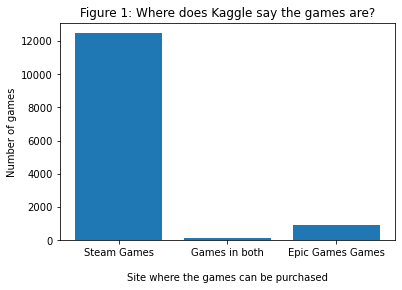

In [35]:
# convert to sets to get rid of any duplicates
setSteamGames = set(steamGames)
setEpicGames = set(epicGames)
setBoth = set(sameGames)
# print(setSteamGames)
# print(setEpicGames)
# print(setBoth)

# make 3 separate columns, one for the steam games, one for both, and one for epic games,
# have the values be the length of the set of unique games for all of them and plot it
plt.title("Figure 1: Where does Kaggle say the games are?")
x = [0,1,2]
x_labels = ["Steam Games", "Games in both", "Epic Games Games"]
values = [len(setSteamGames),len(setBoth),len(setEpicGames)]
plt.bar(x,values,tick_label=x_labels)
plt.xlabel("\nSite where the games can be purchased")
plt.ylabel("Number of games")
plt.show()

In [36]:
# testing the palin endpoint
# search for world of goo to get its plain
# https://api.isthereanydeal.com/v02/search/search/?key=&q=assassins%20creed%20odyssey&limit=20&strict=0
rootURL = "https://api.isthereanydeal.com/v02/"
dealKey = "b8483d1fd3c97a607c2a48a4c26fa73d0b19f2ac"
searchURL = rootURL+"search/search/?key="+dealKey+"&limit=1&q="+sameGames[0]
worldOfGooExample = requests.request("GET",searchURL).json()
print(worldOfGooExample)
plainWorldOfGoo = worldOfGooExample["data"]["results"][0]["plain"]
print(plainWorldOfGoo)

{'data': {'results': [{'id': 72664, 'plain': 'worldofgoo', 'title': 'World of Goo'}], 'urls': {'search': 'https://isthereanydeal.com/search/?q=World%20of%20Goo'}}}
worldofgoo


In [37]:
# testing the game overview endpoint
# search World of Goo's overview
# https://api.isthereanydeal.com/v01/game/overview/?key=&region=us&country=US&plains=&shop=steam&ids=app%2F460930%2Csub%2F37125%2Cbundle%2F7078&allowed=steam%2Cepic
rootURL = "https://api.isthereanydeal.com/v01/"
dealKey = "b8483d1fd3c97a607c2a48a4c26fa73d0b19f2ac"
searchURL = rootURL+"game/overview/?key="+dealKey+"&plains="+plainWorldOfGoo+"&shop=steam"
worldOfGooOverview = requests.request("GET",searchURL).json()
pprint(worldOfGooOverview)

{'.meta': {'country': 'US', 'currency': 'USD', 'region': 'us'},
 'data': {'worldofgoo': {'bundles': {'count': 9, 'live': []},
                         'lowest': {'cut': 100,
                                    'price': 0,
                                    'price_formatted': '$0.00',
                                    'recorded': 1556810900,
                                    'recorded_formatted': '3 years ago',
                                    'store': 'Epic Game Store',
                                    'url': None},
                         'price': {'cut': 0,
                                   'drm': ['DRM Free'],
                                   'price': 6.99,
                                   'price_formatted': '$6.99',
                                   'store': 'MacGameStore',
                                   'url': 'https://www.macgamestore.com/product/1111/World-of-Goo/?ars=itad'},
                         'urls': {'bundles': 'https://isthereanydeal.com/specials/

In [38]:
# testing the current price at steam and current price on epic games
# search current price at steam and epic games
# https://api.isthereanydeal.com/v01/game/prices/?key=&plains=endorlight%2Cstoryofsurvivor&region=eu2&country=SK&shops=steam%2Cindiegamestand%2Camazonus&exclude=voidu%2Citchio&added=0
rootURL = "https://api.isthereanydeal.com/v01/"
dealKey = "b8483d1fd3c97a607c2a48a4c26fa73d0b19f2ac"
searchURL = rootURL+"game/prices/?key="+dealKey+"&plains="+plainWorldOfGoo+"&shops=steam,epic"
worldOfGooPrice = requests.request("GET",searchURL).json()
pprint(worldOfGooPrice)

{'.meta': {'currency': 'USD'},
 'data': {'worldofgoo': {'list': [{'drm': ['epic'],
                                   'price_cut': 0,
                                   'price_new': 14.99,
                                   'price_old': 14.99,
                                   'shop': {'id': 'epic',
                                            'name': 'Epic Game Store'},
                                   'url': 'https://store.epicgames.com/p/world-of-goo'},
                                  {'drm': [],
                                   'price_cut': 0,
                                   'price_new': 14.99,
                                   'price_old': 14.99,
                                   'shop': {'id': 'steam', 'name': 'Steam'},
                                   'url': 'https://store.steampowered.com/app/22000/'}],
                         'urls': {'game': 'https://isthereanydeal.com/#/page:game/info?plain=worldofgoo'}}}}


In [39]:
# testing the lowest prices endpoint on steam and epic games
# search lowest price for steam and epic games (max 5 games at once)
# https://api.isthereanydeal.com/v01/game/storelow/?key=&plains=europauniversalisiv%2Cfalloutiv&region=eu2&country=SK&shops=gog%2Cgreenmangaming%2Csteam&exclude=amazonus%2Cfanatical
rootURL = "https://api.isthereanydeal.com/v01/"
dealKey = "b8483d1fd3c97a607c2a48a4c26fa73d0b19f2ac"
searchURL = rootURL+"game/storelow/?key="+dealKey+"&plains="+plainWorldOfGoo+"&shops=steam,epic"
worldOfGooLowest = requests.request("GET",searchURL).json()
pprint(worldOfGooLowest)

{'.meta': {'currency': 'USD'},
 'data': {'worldofgoo': [{'price': 0.99, 'shop': 'steam'},
                         {'price': 2.24, 'shop': 'epic'}]}}


In [40]:
# getting all of the lowest prices of the games on both steam and epic games
# initialize a list to hold all of the dictionary returns
allLowestPrices = []

# record the first index as 0
prevI = 0

# store root URL and key to use later on
rootURL = "https://api.isthereanydeal.com/v01/"
dealKey = "b8483d1fd3c97a607c2a48a4c26fa73d0b19f2ac"

# loop through most of the plain game titles and query them 5 at a time because the API only limits 5 at a time
# the range is the floor of the length of the game list divided by 5, which will allow for multiplying by 5 without getting a seg fault, but
# it will cut off the last few games as the list is not a multiple of 5.
for i in range(int(len(plainGames)/5)):
    # continue because don't want to just query the first game on the first loop
    if i == 0:
        continue

    # update the search URL with 5 values from the list, by cutting off the string concatination brackets, removing the spaces, and removing the apostrophes
    searchURL = rootURL+"game/storelow/?key="+dealKey+"&plains="+str(plainGames[prevI:i*5])[1:-1].replace(" ","").replace("'","")+"&shops=steam,epic"
    # print(searchURL)
    
    # add the response dictionary to a list to later go through
    allLowestPrices.append(requests.request("GET",searchURL).json())
    
    # update the starting place in the list
    prevI = i*5
    
# get the last three games from the plain games list that were not caught in the loop
# and query the API and add the response to the list
searchURL = rootURL+"game/storelow/?key="+dealKey+"&plains="+str(plainGames[110:])[1:-1].replace(" ","").replace("'","")+"&shops=steam,epic"
allLowestPrices.append(requests.request("GET",searchURL).json())

In [41]:
# looking at data
pprint(allLowestPrices)

[{'.meta': {'currency': 'USD'},
  'data': {'alanwake': [{'price': 1.49, 'shop': 'steam'},
                        {'price': 1.49, 'shop': 'epic'}],
           'costumequest': [{'price': 0.99, 'shop': 'steam'},
                            {'price': 2.49, 'shop': 'epic'}],
           'supermeatboy': [{'price': 0.74, 'shop': 'epic'},
                            {'price': 0.74, 'shop': 'steam'}],
           'torchlight': [{'price': 2.99, 'shop': 'steam'},
                          {'price': 3.74, 'shop': 'epic'}],
           'worldofgoo': [{'price': 0.99, 'shop': 'steam'},
                          {'price': 2.24, 'shop': 'epic'}]}},
 {'.meta': {'currency': 'USD'},
  'data': {'torchlightii': [{'price': 3.99, 'shop': 'steam'},
                            {'price': 4.99, 'shop': 'epic'}]}},
 {'.meta': {'currency': 'USD'},
  'data': {'legendofgrimrock': [{'price': 2.24, 'shop': 'steam'},
                                {'price': 2.99, 'shop': 'epic'}],
           'littleinferno': [{'price': 1

In [42]:
# distilling the data from the massive API return
# initialize three lists: one for the game name, one for its lowest price on steam, and one
# for its lowest price on epic games
gameRemainingList = []
steamLowestList = []
epicLowestList = []

# loop through each dictionary in the list of dictionaries
for groupDict in allLowestPrices:
    # loop through each game of each request
    for game in groupDict['data']:
        # variables to simplify typing more out
        d0 = groupDict['data'][game][0]
        d1 = groupDict['data'][game][1]

        # there are two dictionares per game: one for the steam lowest price and epic games lowest price,
        # but they are in a random order, so I created a temporary dictionary where the key is the name 
        # of the shop and the value is the price. This way I can just search for steam and epic games without
        # having to look at the key-value pairs and do a if statement to place the correct price in the right list
        # (otherwise the steam list might have some of the epic games lowest prices and vice versa)
        tmpDict = {}
        tmpDict[d0['shop']] = d0['price']
        tmpDict[d1['shop']] = d1['price']

        # add the game name, steam lowest price, and epic games lowest price to their respecitve list,
        # which will be in a recorded order to put into a DataFrame
        gameRemainingList.append(game)
        steamLowestList.append(tmpDict['steam'])
        epicLowestList.append(tmpDict['epic'])

# checking data
print("Games:\n" + str(gameRemainingList))
print("Steam Lowest:\n" + str(steamLowestList))
print("Epic Lowest:\n" + str(epicLowestList))

Games:
['alanwake', 'costumequest', 'supermeatboy', 'torchlight', 'worldofgoo', 'torchlightii', 'legendofgrimrock', 'littleinferno', 'shadowrunreturns', 'transistor', 'nuclearthrone', 'roguelegacy', 'verdun', 'aquanoxdeepdescent', 'hyperlightdrifter', 'towerfallascension', 'grandtheftautov', 'iracing', 'subnautica', 'towerofguns', 'imagineearth', 'soma', 'thiswarofmine', 'rebelgalaxy', 'rimworld', 'sokobond', 'thefall', 'submerged', 'ironcast', 'superhot', 'aer', 'axiomverge', 'zombi', 'bigpharma', 'doodlegod', 'innerspace', 'defunct', 'elitedangerous', 'sheltered', 'trainvalley', 'barony', 'hue', 'humanresourcemachine', 'shadowcomplexremastered', 'crashlands', 'darksidersiideathinitiveedition', 'hob', 'oxenfree', 'elex', 'chromagun', 'slimerancher', 'conanexiles', 'gonner', 'asemblance', 'overcooked', 'campsunshine', 'oxygennotincluded', 'parkitect', 'ruiner', 'solitairica', 'haven', 'manifoldgarden', 'northgard', 'titanquestanniversaryedition', 'totallyaccuratebattlesimulator', 'hell

In [43]:
# create a dataframe of this data to do analysis on
gameInfoDF = pd.DataFrame()
gameInfoDF["Game"] = gameRemainingList
gameInfoDF["SteamLowest"] = steamLowestList
gameInfoDF["EpicLowest"] = epicLowestList
gameInfoDF

,Game,SteamLowest,EpicLowest
0,alanwake,1.49,1.49
1,costumequest,0.99,2.49
2,supermeatboy,0.74,0.74
3,torchlight,2.99,3.74
4,worldofgoo,0.99,2.24
...,...,...,...
62,northgard,7.49,14.99
63,titanquestanniversaryedition,3.99,4.99
64,totallyaccuratebattlesimulator,6.79,11.24
65,helloneighbor,4.79,7.49


In [44]:
# find the price difference between epic and steam, and add this as a new column in the dataframe
# a negative price indicates a better lower price on epic games compared to steam
gameInfoDF["SteamMinusEpic"] = gameInfoDF["SteamLowest"] - gameInfoDF["EpicLowest"]
gameInfoDF

,Game,SteamLowest,EpicLowest,SteamMinusEpic
0,alanwake,1.49,1.49,0.00
1,costumequest,0.99,2.49,-1.50
2,supermeatboy,0.74,0.74,0.00
3,torchlight,2.99,3.74,-0.75
4,worldofgoo,0.99,2.24,-1.25
...,...,...,...,...
62,northgard,7.49,14.99,-7.50
63,titanquestanniversaryedition,3.99,4.99,-1.00
64,totallyaccuratebattlesimulator,6.79,11.24,-4.45
65,helloneighbor,4.79,7.49,-2.70


In [45]:
# concatenate the end to graph better by having less groups to graph later on
gameInfoDF["IntSteamMinusEpic"] = gameInfoDF["SteamMinusEpic"].apply(lambda x:int(x))
gameInfoDF

,Game,SteamLowest,EpicLowest,SteamMinusEpic,IntSteamMinusEpic
0,alanwake,1.49,1.49,0.00,0
1,costumequest,0.99,2.49,-1.50,-1
2,supermeatboy,0.74,0.74,0.00,0
3,torchlight,2.99,3.74,-0.75,0
4,worldofgoo,0.99,2.24,-1.25,-1
...,...,...,...,...,...
62,northgard,7.49,14.99,-7.50,-7
63,titanquestanniversaryedition,3.99,4.99,-1.00,-1
64,totallyaccuratebattlesimulator,6.79,11.24,-4.45,-4
65,helloneighbor,4.79,7.49,-2.70,-2


In [46]:
# read in the created data of the game ratings
gameRatingsDF = pd.read_csv("gameRatings.csv")
gameRatingsDF

,Game,MetacriticScore,UserScore
0,alanwake,83,8.0
1,costumequest,77,8.0
2,supermeatboy,87,8.2
3,torchlight,83,7.9
4,worldofgoo,90,8.4
...,...,...,...
62,northgard,81,7.4
63,titanquestanniversaryedition,-1,8.0
64,totallyaccuratebattlesimulator,-1,7.7
65,helloneighbor,38,5.0


In [47]:
# add the ratings to the general game info dataframe
gameInfoDF["MetacriticScore"] = gameRatingsDF["MetacriticScore"]
gameInfoDF["UserScore"] = gameRatingsDF["UserScore"]
gameInfoDF["SteamMinusEpic"]

0     0.00
1    -1.50
2     0.00
3    -0.75
4    -1.25
      ... 
62   -7.50
63   -1.00
64   -4.45
65   -2.70
66   -2.00
Name: SteamMinusEpic, Length: 67, dtype: float64

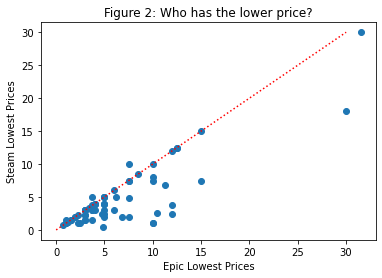

In [48]:
# Plot a scatter plot between steam's lowest price and epic's lowest price
plt.title("Figure 2: Who has the lower price?")
plt.scatter(x=gameInfoDF["EpicLowest"],y=gameInfoDF["SteamLowest"],)
# plt.plot([min(gameInfoDF["EpicLowest"]), max(gameInfoDF["EpicLowest"])], [min(gameInfoDF["SteamLowest"]), max(gameInfoDF["SteamLowest"])], color='red', linestyle=':')
plt.plot([0, 30], [0, 30], color='red', linestyle=':')
plt.xlabel("Epic Lowest Prices")
plt.ylabel("Steam Lowest Prices")
plt.show()

<AxesSubplot:title={'center':'Figure 3: Which service should I wait for?'}, xlabel='Steam Price Minus Epic Price (Lower value means Steam had the better deal)', ylabel='Number of Games'>

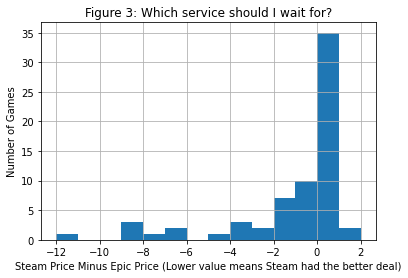

In [49]:
# plot the values counts to see the groupings of the difference in price
# (why I did the concatenation earlier on)
plt.title("Figure 3: Which service should I wait for?")
plt.xlabel("Steam Price Minus Epic Price (Lower value means Steam had the better deal)")
plt.ylabel("Number of Games")
gameInfoDF["IntSteamMinusEpic"].hist(bins=14)

Text(0, 0.5, 'Price Difference')

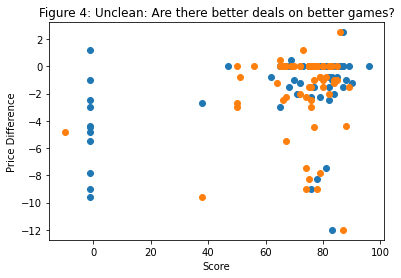

In [50]:
# unclean: seeing if one service goes lower for better games
plt.title("Figure 4: Unclean: Are there better deals on better games?")
plt.scatter(gameInfoDF["MetacriticScore"], gameInfoDF["SteamMinusEpic"])
# multiply the user score by ten to get it onto the same scale as the metacritic score
plt.scatter(gameInfoDF["UserScore"]*10, gameInfoDF["SteamMinusEpic"])
plt.xlabel("Score")
plt.ylabel("Price Difference")

In [51]:
# cleaning up the data as some of the games did not have metacritic or user scores, which were represented by a -1
# using numpy arrays as they have a perfect delete feature for it
metacriticScoreArray = np.array(gameInfoDF["MetacriticScore"])
userScoreArray = np.array(gameInfoDF["UserScore"])
priceDifferenceArray =np.array(gameInfoDF["SteamMinusEpic"])
# print(metacriticScoreArray)
# print(userScoreArray)
# print(priceDifferenceArray)

# if the metacritic score is -1, then remove the entry from all the arrays
# as there was no metacritic score and maybe no user score
index = 0
badIndexes = []
# loop through all of the elements in the metacritic score to find indexes where 
# the score is -1 and record them to remove them from all three arrays
for element in metacriticScoreArray:
    if(element == -1):
        badIndexes.append(index)
    index += 1
    
# Cleaning the data by deleting the bad indexes
# I hope this is allowed: deleting indexes with a list (I just tried it and it worked)
# Source of Delete: https://numpy.org/doc/stable/reference/generated/numpy.delete.html
metacriticScoreArray = np.delete(metacriticScoreArray,badIndexes)
userScoreArray = np.delete(userScoreArray,badIndexes)
priceDifferenceArray = np.delete(priceDifferenceArray,badIndexes)
# print(metacriticScoreArray)
# print(userScoreArray)
# print(priceDifferenceArray)

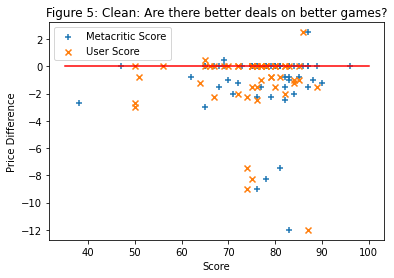

In [52]:
# clean: seeing if one service goes lower for better games
# plotting the clean data set and adding a red line to signify no difference in deals
# using this format of subplots to get the nice label in the figure
# Source: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
fig,ax = plt.subplots()
plt.title("Figure 5: Clean: Are there better deals on better games?")
ax.set_xlabel("Score")
ax.set_ylabel("Price Difference")
legMeta = ax.scatter(metacriticScoreArray, priceDifferenceArray,marker="+",label="Metacritic Score")
legUser = ax.scatter(userScoreArray*10, priceDifferenceArray,marker="x", label="User Score")
ax.plot([35,100],[0,0],color="r")
ax.legend(handles=[legMeta,legUser])

In [53]:
# reading in data and looking at it
epicGamesDF = pd.read_csv("epic games store-video games.csv")
epicGamesDF

,game_link,name,price of game,developer of game,genres of games,features of game,publisher of game,date release,recommended_os,cpu,memory,gpu_x,storage,Critics Recommend,OpenCritic Rating,platform,Top Critic Average
0,"HITMAN - Game of the Year Edition₹3,249",HITMAN - Game of the Year Edition,"₹3,249",IO Interactive A/S,ActionAction-AdventureShooterStealth,Single Player,IO Interactive A/S,09/03/20,OS 64-bit Windows 7 / 64-bit Windows 8 (8.1) o...,"Intel CPU Core i7 3770 3,4 GHz / AMD CPU AMD F...",8,Nvidia GPU GeForce GTX 770 / AMD GPU Radeon R9...,50,92%,Mighty,Windows,84.0
1,"The Medium₹2,949",The Medium,"₹2,949",Bloober Team,HorrorAdventure,Single Player,Bloober Team S.A.,01/28/21,Windows 10 (64bit version only),Intel® Core™ i5-9600 / AMD Ryzen™ 7 3700X,16,@1080p NVIDIA GeForce® GTX 1060 6GB / AMD Rade...,30,63%,Strong,PlatformWindowsWindows,75.0
2,Into the Breach₹446,Into The Breach,₹446,Subset Games,Turn-BasedRogue-LiteStrategy,Single Player,Subset Games,02/27/18,Windows 7+,1.7 GHz,1 GB,NaN,250 MB,90%,Mighty,PlatformWindowsWindowsMac OSMac OS,88.0
3,The Lion's Song₹189,The Lion's Song,₹189,Mi'pu'mi Games,NarrationAdventure,Single Player,Mi'pu'mi Games,05/13/21,Windows 7 / 8 / 10,2 GHZ,1 GB RAM,DirectX 10 compatible,500 MB available space,80%,Strong,PlatformWindowsWindowsMac OSMac OS,81.0
4,Costume Quest₹297,Costume Quest,₹297,Double Fine Productions,RPGAdventure,Single Player,Double Fine Productions,10/19/10,Windows 7 or higher,2.2 GHz dual core CPU,1 GB RAM,NaN,"256 MB GeForce 220, Radeon 4550, Intel HD 3000...",NaN,NaN,PlatformWindowsWindows,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,"Trackmania Turbo₹1,999",Trackmania Turbo,"₹1,999",DeveloperUbisoft Nadeo,Racing,Multiplayer,PublisherUbisoft,Release Date03/24/16,Windows 7 SP1 or Windows 8.1 or Windows 10,NaN,2 GB RAM,NaN,5 GB available space,67%,Strong,PlatformWindowsWindows,78.0
895,"CoromonAvailable Q1, 2022₹469",Coromon,NaN,DeveloperTRAGsoft,RPGAdventureStrategy,Single PlayerCompetitiveMultiplayer,PublisherFreedom Games,"AvailableQ1, 2022",Windows 7,NaN,1 GB,NaN,NaN,69%,Strong,PlatformWindowsWindows,75.0
896,Kingdom New Lands₹446,Kingdom New Lands,₹446,Developernoio,SimulationSurvivalStrategy,Controller SupportSingle Player,PublisherRaw Fury,Release Date10/21/15,Windows XP,NaN,1 GB RAM,Version 9.0c,NaN,50%,Fair,PlatformWindowsWindowsMac OSMac OSMac OSMac OS,73.0
897,NORCO₹349,NORCO,₹349,DeveloperGeography of Robots,NarrationAdventurePuzzle,Single Player,PublisherRaw Fury,Release Date03/24/22,Windows 7,NaN,4GB,Windows 7,3GB,94%,Mighty,PlatformWindowsWindowsMac OSMac OS,91.0


In [54]:
# clean the data by getting rid of all "NaN" and "Free"
# stripping the column because the NaNs are not actually strings
epicGamesDF["price of game"] = epicGamesDF["price of game"].apply(lambda x: str(x).strip())

# the .copy() ensures there won't be warnings later on
# remove the NaNs and Frees, as the frees won't be counted later on anyways due to how im calculating the average
# .copy() Source: https://stackoverflow.com/questions/44028898/a-value-is-trying-to-be-set-on-a-copy-of-a-slice-from-a-dataframe-pandas
epicGamesDF = epicGamesDF[epicGamesDF["price of game"] != "nan"].copy()
epicGamesDF = epicGamesDF[epicGamesDF["price of game"] != "Free"].copy()

# looking at data
epicGamesDF

,game_link,name,price of game,developer of game,genres of games,features of game,publisher of game,date release,recommended_os,cpu,memory,gpu_x,storage,Critics Recommend,OpenCritic Rating,platform,Top Critic Average
0,"HITMAN - Game of the Year Edition₹3,249",HITMAN - Game of the Year Edition,"₹3,249",IO Interactive A/S,ActionAction-AdventureShooterStealth,Single Player,IO Interactive A/S,09/03/20,OS 64-bit Windows 7 / 64-bit Windows 8 (8.1) o...,"Intel CPU Core i7 3770 3,4 GHz / AMD CPU AMD F...",8,Nvidia GPU GeForce GTX 770 / AMD GPU Radeon R9...,50,92%,Mighty,Windows,84.0
1,"The Medium₹2,949",The Medium,"₹2,949",Bloober Team,HorrorAdventure,Single Player,Bloober Team S.A.,01/28/21,Windows 10 (64bit version only),Intel® Core™ i5-9600 / AMD Ryzen™ 7 3700X,16,@1080p NVIDIA GeForce® GTX 1060 6GB / AMD Rade...,30,63%,Strong,PlatformWindowsWindows,75.0
2,Into the Breach₹446,Into The Breach,₹446,Subset Games,Turn-BasedRogue-LiteStrategy,Single Player,Subset Games,02/27/18,Windows 7+,1.7 GHz,1 GB,NaN,250 MB,90%,Mighty,PlatformWindowsWindowsMac OSMac OS,88.0
3,The Lion's Song₹189,The Lion's Song,₹189,Mi'pu'mi Games,NarrationAdventure,Single Player,Mi'pu'mi Games,05/13/21,Windows 7 / 8 / 10,2 GHZ,1 GB RAM,DirectX 10 compatible,500 MB available space,80%,Strong,PlatformWindowsWindowsMac OSMac OS,81.0
4,Costume Quest₹297,Costume Quest,₹297,Double Fine Productions,RPGAdventure,Single Player,Double Fine Productions,10/19/10,Windows 7 or higher,2.2 GHz dual core CPU,1 GB RAM,NaN,"256 MB GeForce 220, Radeon 4550, Intel HD 3000...",NaN,NaN,PlatformWindowsWindows,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,This War of Mine₹521,This War of Mine,₹521,Developer11 Bit Studios,HorrorSurvivalStrategy,Controller SupportSingle Player,Publisher11 bit studios,Release Date11/14/14,Windows 7/8/10,NaN,2 GB RAM,NaN,DirectX compatible,85%,Mighty,PlatformWindowsWindowsMac OSMac OSMac OSMac OS,85.0
894,"Trackmania Turbo₹1,999",Trackmania Turbo,"₹1,999",DeveloperUbisoft Nadeo,Racing,Multiplayer,PublisherUbisoft,Release Date03/24/16,Windows 7 SP1 or Windows 8.1 or Windows 10,NaN,2 GB RAM,NaN,5 GB available space,67%,Strong,PlatformWindowsWindows,78.0
896,Kingdom New Lands₹446,Kingdom New Lands,₹446,Developernoio,SimulationSurvivalStrategy,Controller SupportSingle Player,PublisherRaw Fury,Release Date10/21/15,Windows XP,NaN,1 GB RAM,Version 9.0c,NaN,50%,Fair,PlatformWindowsWindowsMac OSMac OSMac OSMac OS,73.0
897,NORCO₹349,NORCO,₹349,DeveloperGeography of Robots,NarrationAdventurePuzzle,Single Player,PublisherRaw Fury,Release Date03/24/22,Windows 7,NaN,4GB,Windows 7,3GB,94%,Mighty,PlatformWindowsWindowsMac OSMac OS,91.0


In [55]:
# Data came as Indian Rupees, so converting to USD to be consistent with steam, which was 1 USD to 0.012 Rupee
# Convert to a float by getting rid of the Rupee symbol and getting rid of ,s
epicGamesDF["PriceUSD"] = epicGamesDF["price of game"].apply(lambda x: float(x[1:].replace(",","")) * 0.012)
epicGamesDF

,game_link,name,price of game,developer of game,genres of games,features of game,publisher of game,date release,recommended_os,cpu,memory,gpu_x,storage,Critics Recommend,OpenCritic Rating,platform,Top Critic Average,PriceUSD
0,"HITMAN - Game of the Year Edition₹3,249",HITMAN - Game of the Year Edition,"₹3,249",IO Interactive A/S,ActionAction-AdventureShooterStealth,Single Player,IO Interactive A/S,09/03/20,OS 64-bit Windows 7 / 64-bit Windows 8 (8.1) o...,"Intel CPU Core i7 3770 3,4 GHz / AMD CPU AMD F...",8,Nvidia GPU GeForce GTX 770 / AMD GPU Radeon R9...,50,92%,Mighty,Windows,84.0,38.988
1,"The Medium₹2,949",The Medium,"₹2,949",Bloober Team,HorrorAdventure,Single Player,Bloober Team S.A.,01/28/21,Windows 10 (64bit version only),Intel® Core™ i5-9600 / AMD Ryzen™ 7 3700X,16,@1080p NVIDIA GeForce® GTX 1060 6GB / AMD Rade...,30,63%,Strong,PlatformWindowsWindows,75.0,35.388
2,Into the Breach₹446,Into The Breach,₹446,Subset Games,Turn-BasedRogue-LiteStrategy,Single Player,Subset Games,02/27/18,Windows 7+,1.7 GHz,1 GB,NaN,250 MB,90%,Mighty,PlatformWindowsWindowsMac OSMac OS,88.0,5.352
3,The Lion's Song₹189,The Lion's Song,₹189,Mi'pu'mi Games,NarrationAdventure,Single Player,Mi'pu'mi Games,05/13/21,Windows 7 / 8 / 10,2 GHZ,1 GB RAM,DirectX 10 compatible,500 MB available space,80%,Strong,PlatformWindowsWindowsMac OSMac OS,81.0,2.268
4,Costume Quest₹297,Costume Quest,₹297,Double Fine Productions,RPGAdventure,Single Player,Double Fine Productions,10/19/10,Windows 7 or higher,2.2 GHz dual core CPU,1 GB RAM,NaN,"256 MB GeForce 220, Radeon 4550, Intel HD 3000...",NaN,NaN,PlatformWindowsWindows,NaN,3.564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,This War of Mine₹521,This War of Mine,₹521,Developer11 Bit Studios,HorrorSurvivalStrategy,Controller SupportSingle Player,Publisher11 bit studios,Release Date11/14/14,Windows 7/8/10,NaN,2 GB RAM,NaN,DirectX compatible,85%,Mighty,PlatformWindowsWindowsMac OSMac OSMac OSMac OS,85.0,6.252
894,"Trackmania Turbo₹1,999",Trackmania Turbo,"₹1,999",DeveloperUbisoft Nadeo,Racing,Multiplayer,PublisherUbisoft,Release Date03/24/16,Windows 7 SP1 or Windows 8.1 or Windows 10,NaN,2 GB RAM,NaN,5 GB available space,67%,Strong,PlatformWindowsWindows,78.0,23.988
896,Kingdom New Lands₹446,Kingdom New Lands,₹446,Developernoio,SimulationSurvivalStrategy,Controller SupportSingle Player,PublisherRaw Fury,Release Date10/21/15,Windows XP,NaN,1 GB RAM,Version 9.0c,NaN,50%,Fair,PlatformWindowsWindowsMac OSMac OSMac OSMac OS,73.0,5.352
897,NORCO₹349,NORCO,₹349,DeveloperGeography of Robots,NarrationAdventurePuzzle,Single Player,PublisherRaw Fury,Release Date03/24/22,Windows 7,NaN,4GB,Windows 7,3GB,94%,Mighty,PlatformWindowsWindowsMac OSMac OS,91.0,4.188


In [56]:
# adding separate columns for each genre that steam has except for massively multiplayer as there are none of those on the epic games csv
# extracting the same genres (except for massive multiplayer) out of epic games genres list as the steam does in its true (1) and false (0) sections
# note: for the apply function I had to wrap the x with string because otherwise it would consider it a float and would not work
# One Line if-else for the lambda function: https://www.codingem.com/python-one-line-if-else/
epicGamesDF["isAction"] = epicGamesDF["genres of games"].apply(lambda x: 1 if "Action" in str(x) else 0)
epicGamesDF["isAdventure"] = epicGamesDF["genres of games"].apply(lambda x: 1 if "Adventure" in str(x) else 0)
epicGamesDF["isCasual"] = epicGamesDF["genres of games"].apply(lambda x: 1 if "Casual" in str(x) else 0)
epicGamesDF["isStrategy"] = epicGamesDF["genres of games"].apply(lambda x: 1 if "Strategy" in str(x) else 0)
epicGamesDF["isRPG"] = epicGamesDF["genres of games"].apply(lambda x: 1 if "RPG" in str(x) else 0)
epicGamesDF["isSimulation"] = epicGamesDF["genres of games"].apply(lambda x: 1 if "Simulation" in str(x) else 0)
epicGamesDF["isSports"] = epicGamesDF["genres of games"].apply(lambda x: 1 if "Sports" in str(x) else 0)
epicGamesDF["isRacing"] = epicGamesDF["genres of games"].apply(lambda x: 1 if "Racing" in str(x) else 0)
epicGamesDF

,game_link,name,price of game,developer of game,genres of games,features of game,publisher of game,date release,recommended_os,cpu,memory,gpu_x,storage,Critics Recommend,OpenCritic Rating,platform,Top Critic Average,PriceUSD,isAction,isAdventure,isCasual,isStrategy,isRPG,isSimulation,isSports,isRacing
0,"HITMAN - Game of the Year Edition₹3,249",HITMAN - Game of the Year Edition,"₹3,249",IO Interactive A/S,ActionAction-AdventureShooterStealth,Single Player,IO Interactive A/S,09/03/20,OS 64-bit Windows 7 / 64-bit Windows 8 (8.1) o...,"Intel CPU Core i7 3770 3,4 GHz / AMD CPU AMD F...",8,Nvidia GPU GeForce GTX 770 / AMD GPU Radeon R9...,50,92%,Mighty,Windows,84.0,38.988,1,1,0,0,0,0,0,0
1,"The Medium₹2,949",The Medium,"₹2,949",Bloober Team,HorrorAdventure,Single Player,Bloober Team S.A.,01/28/21,Windows 10 (64bit version only),Intel® Core™ i5-9600 / AMD Ryzen™ 7 3700X,16,@1080p NVIDIA GeForce® GTX 1060 6GB / AMD Rade...,30,63%,Strong,PlatformWindowsWindows,75.0,35.388,0,1,0,0,0,0,0,0
2,Into the Breach₹446,Into The Breach,₹446,Subset Games,Turn-BasedRogue-LiteStrategy,Single Player,Subset Games,02/27/18,Windows 7+,1.7 GHz,1 GB,NaN,250 MB,90%,Mighty,PlatformWindowsWindowsMac OSMac OS,88.0,5.352,0,0,0,1,0,0,0,0
3,The Lion's Song₹189,The Lion's Song,₹189,Mi'pu'mi Games,NarrationAdventure,Single Player,Mi'pu'mi Games,05/13/21,Windows 7 / 8 / 10,2 GHZ,1 GB RAM,DirectX 10 compatible,500 MB available space,80%,Strong,PlatformWindowsWindowsMac OSMac OS,81.0,2.268,0,1,0,0,0,0,0,0
4,Costume Quest₹297,Costume Quest,₹297,Double Fine Productions,RPGAdventure,Single Player,Double Fine Productions,10/19/10,Windows 7 or higher,2.2 GHz dual core CPU,1 GB RAM,NaN,"256 MB GeForce 220, Radeon 4550, Intel HD 3000...",NaN,NaN,PlatformWindowsWindows,NaN,3.564,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,This War of Mine₹521,This War of Mine,₹521,Developer11 Bit Studios,HorrorSurvivalStrategy,Controller SupportSingle Player,Publisher11 bit studios,Release Date11/14/14,Windows 7/8/10,NaN,2 GB RAM,NaN,DirectX compatible,85%,Mighty,PlatformWindowsWindowsMac OSMac OSMac OSMac OS,85.0,6.252,0,0,0,1,0,0,0,0
894,"Trackmania Turbo₹1,999",Trackmania Turbo,"₹1,999",DeveloperUbisoft Nadeo,Racing,Multiplayer,PublisherUbisoft,Release Date03/24/16,Windows 7 SP1 or Windows 8.1 or Windows 10,NaN,2 GB RAM,NaN,5 GB available space,67%,Strong,PlatformWindowsWindows,78.0,23.988,0,0,0,0,0,0,0,1
896,Kingdom New Lands₹446,Kingdom New Lands,₹446,Developernoio,SimulationSurvivalStrategy,Controller SupportSingle Player,PublisherRaw Fury,Release Date10/21/15,Windows XP,NaN,1 GB RAM,Version 9.0c,NaN,50%,Fair,PlatformWindowsWindowsMac OSMac OSMac OSMac OS,73.0,5.352,0,0,0,1,0,1,0,0
897,NORCO₹349,NORCO,₹349,DeveloperGeography of Robots,NarrationAdventurePuzzle,Single Player,PublisherRaw Fury,Release Date03/24/22,Windows 7,NaN,4GB,Windows 7,3GB,94%,Mighty,PlatformWindowsWindowsMac OSMac OS,91.0,4.188,0,1,0,0,0,0,0,0


In [57]:
# isolating each genre and all of the games with that genre (if it is the genre its price will be recorded 
# because it will be multiplied by 1 and not 0) (one caveat of this is that free games are not recorded)
epicActionPrices = np.array(epicGamesDF["PriceUSD"] * epicGamesDF["isAction"])
epicAdventurePrices = np.array(epicGamesDF["PriceUSD"] * epicGamesDF["isAdventure"])
epicCasualPrices = np.array(epicGamesDF["PriceUSD"] * epicGamesDF["isCasual"])
epicStrategyPrices = np.array(epicGamesDF["PriceUSD"] * epicGamesDF["isStrategy"])
epicRPGPrices = np.array(epicGamesDF["PriceUSD"] * epicGamesDF["isRPG"])
epicSimulationPrices = np.array(epicGamesDF["PriceUSD"] * epicGamesDF["isSimulation"])
epicSportsPrices = np.array(epicGamesDF["PriceUSD"] * epicGamesDF["isSports"])
epicRacingPrices = np.array(epicGamesDF["PriceUSD"] * epicGamesDF["isRacing"])

# getting rid of all of the games with a price of 0 in the genre arrays
epicActionPrices = epicActionPrices[epicActionPrices != 0]
epicAdventurePrices = epicAdventurePrices[epicAdventurePrices != 0]
epicCasualPrices = epicCasualPrices[epicCasualPrices != 0]
epicStrategyPrices = epicStrategyPrices[epicStrategyPrices != 0]
epicRPGPrices = epicRPGPrices[epicRPGPrices != 0]
epicSimulationPrices = epicSimulationPrices[epicSimulationPrices != 0]
epicSportsPrices = epicSportsPrices[epicSportsPrices != 0]
epicRacingPrices = epicRacingPrices[epicRacingPrices != 0]

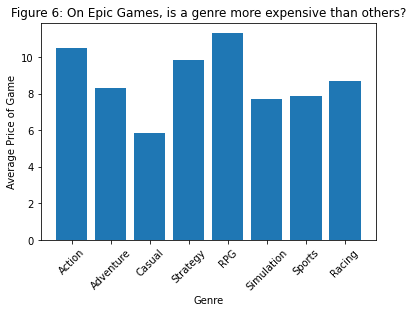

In [58]:
# graph each genre and their average price
# use a bar plot to show the different genres and their associated average prices of games that have a price (not free)
plt.title("Figure 6: On Epic Games, is a genre more expensive than others?")
x = [0,1,2,3,4,5,6,7]
x_labels = ["Action", "Adventure", "Casual", "Strategy", "RPG", "Simulation", "Sports", "Racing"]
values = [np.mean(epicActionPrices),np.mean(epicAdventurePrices),np.mean(epicCasualPrices),np.mean(epicStrategyPrices),np.mean(epicRPGPrices),np.mean(epicSimulationPrices),np.mean(epicSportsPrices),np.mean(epicRacingPrices)]
plt.bar(x,values,tick_label=x_labels)
plt.xlabel("Genre")
plt.ylabel("Average Price of Game")
plt.xticks(rotation=45)
plt.show()

In [59]:
# reading in data and looking at it
steamGamesDF = pd.read_csv("games-features-edit.csv")
steamGamesDF

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,ObserVR Beta,Oct 26 2016,0,0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,0.00
12620,One Night Stand,NaN,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99
12622,Charm Tale Quest,Oct 27 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99


In [60]:
# convert the steam genres to the same genre columns that we did with the epic games to just do the same thing as before
steamGamesDF["isAction"] = steamGamesDF["GenreIsAction"].apply(lambda x: 1 if "True" in str(x) else 0)
steamGamesDF["isAdventure"] = steamGamesDF["GenreIsAdventure"].apply(lambda x: 1 if "True" in str(x) else 0)
steamGamesDF["isCasual"] = steamGamesDF["GenreIsCasual"].apply(lambda x: 1 if "True" in str(x) else 0)
steamGamesDF["isStrategy"] = steamGamesDF["GenreIsStrategy"].apply(lambda x: 1 if "True" in str(x) else 0)
steamGamesDF["isRPG"] = steamGamesDF["GenreIsRPG"].apply(lambda x: 1 if "True" in str(x) else 0)
steamGamesDF["isSimulation"] = steamGamesDF["GenreIsSimulation"].apply(lambda x: 1 if "True" in str(x) else 0)
steamGamesDF["isSports"] = steamGamesDF["GenreIsSports"].apply(lambda x: 1 if "True" in str(x) else 0)
steamGamesDF["isRacing"] = steamGamesDF["GenreIsRacing"].apply(lambda x: 1 if "True" in str(x) else 0)
steamGamesDF["isMassivelyMultiplayer"] = steamGamesDF["GenreIsMassivelyMultiplayer"].apply(lambda x: 1 if "True" in str(x) else 0)
steamGamesDF.head(25)

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,isAction,isAdventure,isCasual,isStrategy,isRPG,isSimulation,isSports,isRacing,isMassivelyMultiplayer
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,1,0,0,0,0,0,0,0,0
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,1,0,0,0,0,0,0,0,0
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,1,0,0,0,0,0,0,0,0
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,1,0,0,0,0,0,0,0,0
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,1,0,0,0,0,0,0,0,0
5,Ricochet,Nov 1 2000,0,1965,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,1,0,0,0,0,0,0,0,0
6,Half-Life,Nov 8 1998,96,12486,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,1,0,0,0,0,0,0,0,0
7,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,1,0,0,0,0,0,0,0,0
8,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,1,0,0,0,0,0,0,0,0
9,Half-Life: Blue Shift,Jun 1 2001,71,2219,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,1,0,0,0,0,0,0,0,0


In [61]:
# isolating each genre and all of the games with that genre (if it is the genre its price will be recorded 
# because it will be multiplied by 1 and not 0) (one caveat of this is that free games are not recorded)
steamActionPrices = np.array(steamGamesDF["PriceInitial"] * steamGamesDF["isAction"])
steamAdventurePrices = np.array(steamGamesDF["PriceInitial"] * steamGamesDF["isAdventure"])
steamCasualPrices = np.array(steamGamesDF["PriceInitial"] * steamGamesDF["isCasual"])
steamStrategyPrices = np.array(steamGamesDF["PriceInitial"] * steamGamesDF["isStrategy"])
steamRPGPrices = np.array(steamGamesDF["PriceInitial"] * steamGamesDF["isRPG"])
steamSimulationPrices = np.array(steamGamesDF["PriceInitial"] * steamGamesDF["isSimulation"])
steamSportsPrices = np.array(steamGamesDF["PriceInitial"] * steamGamesDF["isSports"])
steamRacingPrices = np.array(steamGamesDF["PriceInitial"] * steamGamesDF["isRacing"])
steamMassiveMultiplayerPrices = np.array(steamGamesDF["PriceInitial"] * steamGamesDF["isMassivelyMultiplayer"])

# getting rid of all of the games with a price of 0 in the genre arrays
steamActionPrices = steamActionPrices[steamActionPrices != 0]
steamAdventurePrices = steamAdventurePrices[steamAdventurePrices != 0]
steamCasualPrices = steamCasualPrices[steamCasualPrices != 0]
steamStrategyPrices = steamStrategyPrices[steamStrategyPrices != 0]
steamRPGPrices = steamRPGPrices[steamRPGPrices != 0]
steamSimulationPrices = steamSimulationPrices[steamSimulationPrices != 0]
steamSportsPrices = steamSportsPrices[steamSportsPrices != 0]
steamRacingPrices = steamRacingPrices[steamRacingPrices != 0]
steamMassiveMultiplayerPrices = steamMassiveMultiplayerPrices[steamMassiveMultiplayerPrices != 0]

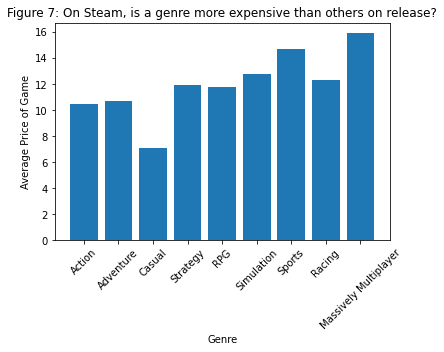

In [62]:
# use a bar plot to show the different genres and their associated average prices of games that have a price (not free)
plt.title("Figure 7: On Steam, is a genre more expensive than others on release?")
x = [0,1,2,3,4,5,6,7,8]
x_labels = ["Action", "Adventure", "Casual", "Strategy", "RPG", "Simulation", "Sports", "Racing", "Massively Multiplayer"]
values = [np.mean(steamActionPrices),np.mean(steamAdventurePrices),np.mean(steamCasualPrices),np.mean(steamStrategyPrices),np.mean(steamRPGPrices),np.mean(steamSimulationPrices),np.mean(steamSportsPrices),np.mean(steamRacingPrices),np.mean(steamMassiveMultiplayerPrices)]
plt.bar(x,values,tick_label=x_labels)
plt.xlabel("Genre")
plt.ylabel("Average Price of Game")
plt.xticks(rotation=45)
plt.show()